<a href="https://colab.research.google.com/github/keizikang/self_study_mldl/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_7%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 7. 딥러닝
---

---

## 7.1 인공 신경망

---

In [1]:
# 패션 mnist 데이터 불러옴
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


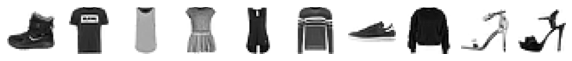

In [2]:
# 데이터를 이미지로 확인
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [3]:
# 픽셀값을 [0, 1] 범위로 정규화
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

import numpy as np

# SGDClassifier + cross_validate
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [4]:
from sklearn.model_selection import train_test_split

# 훈련/검증 세트 나누기
# train_scaled가 덮어써지므로 반복해서 실행하지 말 것
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [5]:
# 밀집층 객체 만들기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

# 신경망 모델 만들기
model = keras.Sequential(dense)

# 모델 손실함수와 metrics 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 3ms/step - loss: 0.6092 - accuracy: 0.7921
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4782 - accuracy: 0.8413
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4553 - accuracy: 0.8482
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4441 - accuracy: 0.8537
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4363 - accuracy: 0.8547


In [6]:
# 모델 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4524 - accuracy: 0.8512


[0.45236095786094666, 0.8512499928474426]

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


---

## 7.2 심층 신경망

---

---

### 7.2.1 층을 생성하는 세 가지 방법

---

In [8]:
# 패션 mnist 데이터 불러와서 훈련/검증 세트로 나눔
# 앞에서 train_scaled를 바꿨으므로 다시 불러와야 함

from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [9]:
# 층을 생성하는 첫 번째 방법
# 각 밀집층 객체를 만들고 keras.Sequential에 인자로 전달
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

# 심층 신경망 생성
model = keras.Sequential([dense1, dense2])

# 모델 요약정보 보기
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


---

Model: 모델 이름

그 아래에 층이 순서대로 출력됨

은닉층과 출력층의 첫번째 차원 크기가 None인 이유?

입력 데이터에 따라 미니 배치 크기가 달라지기 때문

그래서 첫번째 차원을 배치 차원이라고 부름

batch_size 파라미터로 설정 가능

78500 = 784 * 100 + 100

1010 = 100 * 10 + 10

---

In [10]:
# 층을 생성하는 두 번째 방법
# 밀집층 객체를 keras.Sequential에 입력인자로 바로 생성
# name으로 모델과 밀집층의 이름을 설정할 수 있음
model = keras.Sequential([
    keras.layers.Dense(100, 
                       activation='sigmoid', 
                       input_shape=(784,), 
                       name='hidden'),
    keras.layers.Dense(10, 
                       activation='softmax', 
                       name='output')
], name='패션 MNIST 모델')
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 층을 생성하는 세 번째 방법
# add() 메서드를 사용
# 층이 많을 때 편리함
model = keras.Sequential()
model.add(keras.layers.Dense(100, 
                             activation='sigmoid', 
                             input_shape=(784,), 
                             name='hidden'))
model.add(keras.layers.Dense(10, 
                             activation='softmax', 
                             name='output'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델 손실함수와 metrics 설정, 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5603 - accuracy: 0.8097
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4072 - accuracy: 0.8534
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3717 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3495 - accuracy: 0.8739
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3323 - accuracy: 0.8803


---

### 7.2.2 Flatten과 Relu

이미지를 1차원으로 펴는 편리한 방법: Flatten

Flatten도 층으로 보고 add로 더할 수 있음

하지만 진짜 층은 아님

아래 코드로 만든 모델은 깊이가 2임

케라스 API는 입력 데이터의 전처리를 모델에 포함시키도록 설계되어 있음

---

은닉층의 활성화 함수는 sigmoid 말고도 relu라는게 있음

이미지 처리에 좋은 성능을 낸다고 알려져 있음

---

In [13]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 패션 MNIST 데이터 불러오고 훈련/검증 세트 나눔
# 이미 입력을 Flatten 했으므로 reshape은 필요없음
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# 컴파일 및 훈련
model.compile(loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5326 - accuracy: 0.8126
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3920 - accuracy: 0.8585
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3550 - accuracy: 0.8718
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3348 - accuracy: 0.8806
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3198 - accuracy: 0.8855


In [15]:
# 검증 세트 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3643 - accuracy: 0.8727


[0.36429154872894287, 0.8727499842643738]

---

### 7.2.3 옵티마이저

신경망에서 조절할 수 있는 하이퍼파라미터

- 은닉층의 개수
- 은닉층의 뉴런 개수
- 은닉층의 활성화 함수
- 층의 종류 (밀집층, 합성곱 등)
- 배치 크기 (batch_size)
- 반복 횟수 (epochs)
- 옵티마이저 (기본값=경사하강법(RMSprop))
- 옵티마이저의 학습률

---

옵티마이저의 종류: 기본 경사 하강법, 적응적 학습률 옵티마이저가 있음

* 기본 경사 하강법
  * 모두 keras.optimizer.SGD 클래스를 사용함
  * 모멘텀 최적화: momentum을 이용하여 이전 그레디언트를 가속도처럼 사용할 수 있음
  * momentum의 기본값은 0
  * momentum이 0보다 크면 모멘텀 최적화
  * nesterov=True이면 네스테로프 최적화: 모멘텀 최적화를 2번 반복함

* 적응적 학습률 옵티마이저
  * 모델이 최적점에 가까이 갈수록 학습률을 낮춰 수렴 안정성을 높임
  * 학습률 매개변수를 튜닝하지 않아도 됨
  * RMSprop: keras.optimizer.RMSprop()을 compile의 optimizer로 설정
  * Adagrad: keras.optimizer.Adagrad()를 compile의 optimizer로 설정
  * Adam: 모멘텀 최적화와 RMSprop의 장점을 접목
  * 위 3개는 모두 learning_rate의 기본값이 0.001임

In [16]:
# Adam을 사용
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 컴파일, 훈련
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5196 - accuracy: 0.8201
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3948 - accuracy: 0.8594
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3521 - accuracy: 0.8724
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3264 - accuracy: 0.8813
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3047 - accuracy: 0.8876


In [17]:
# 검증 세트 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.3459 - accuracy: 0.8737


[0.3458954393863678, 0.8737499713897705]

---

## 7.3 신경망 모델 훈련

---

In [18]:
# 데이터 준비
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [19]:
# 신경망 모델에 레이어를 추가하는 함수
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [20]:
# 모델 생성, 컴파일, 훈련 및 히스토리 생성
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

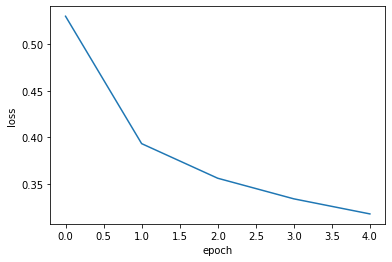

In [21]:
# 히스토리를 이용해 에포크마다 손실을 plot
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

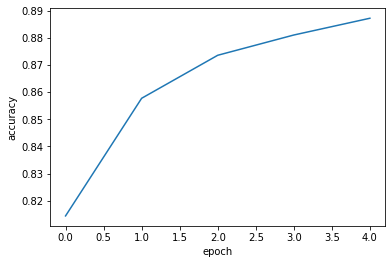

In [22]:
# 히스토리를 이용해 에포크마다 정확도를 plot
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

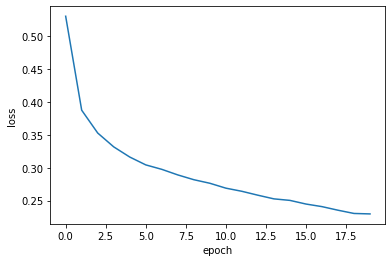

In [23]:
# 에포크를 늘려서 다시 해보자
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

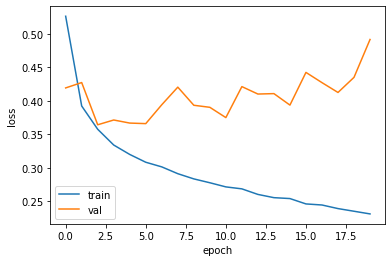

In [24]:
# 검증 세트의 손실함수도 같이 plot 해보자
# model.fit()에 validation_data를 전달하면 됨
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, 
                    epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

# 그래프로 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

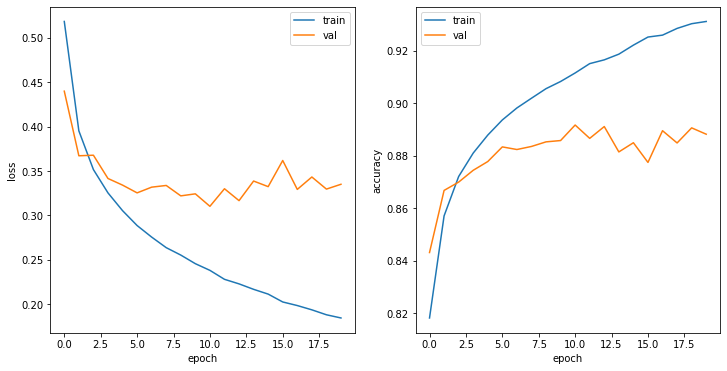

In [34]:
# 옵티마이저를 Adam으로 바꿔서 해보자
model = model_fn()
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, 
                    epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

# 그래프로 확인
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set(xlabel='epoch', ylabel='loss')
ax[0].legend(['train', 'val'])
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set(xlabel='epoch', ylabel='accuracy')
ax[1].legend(['train', 'val'])

plt.show()

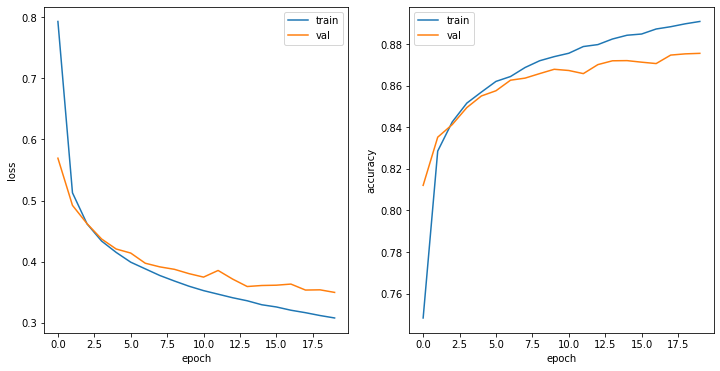

In [35]:
# Adam의 학습률을 1e-4로 줄여보자
model = model_fn()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, 
                    epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

# 그래프로 확인
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set(xlabel='epoch', ylabel='loss')
ax[0].legend(['train', 'val'])
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set(xlabel='epoch', ylabel='accuracy')
ax[1].legend(['train', 'val'])

plt.show()

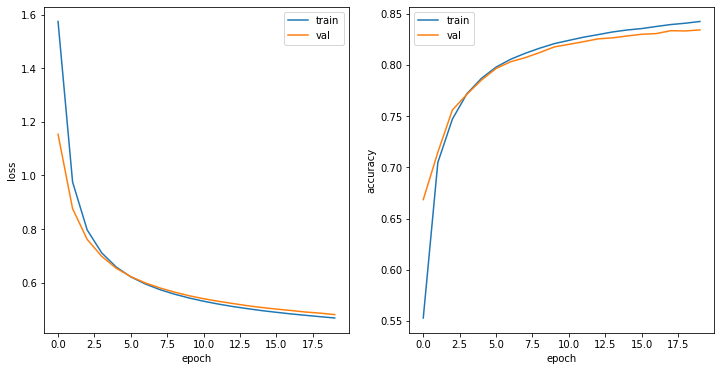

In [36]:
# Adam의 학습률을 1e-5로 줄여보자
model = model_fn()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, 
                    epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

# 그래프로 확인
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set(xlabel='epoch', ylabel='loss')
ax[0].legend(['train', 'val'])
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set(xlabel='epoch', ylabel='accuracy')
ax[1].legend(['train', 'val'])

plt.show()

---

드롭아웃: 샘플마다 랜덤하게 은닉층의 뉴런을 일부러 뺌

특정 뉴런에 과대하게 의존하지 못하게 방지함

일부러 성능을 낮춘 모델을 여러 개 합치는 앙상블의 개념으로 생각할 수도 있음

---

In [3]:
# 드롭아웃은 keras.layers.Dropout 클래스를 사용함
# Dropout에 0.3을 넣으면 은닉층 뉴런 중 30%를 없앰
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


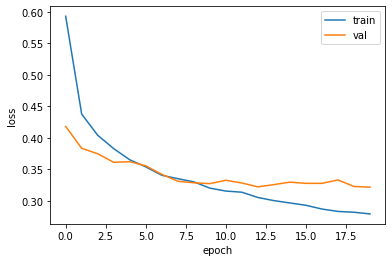

In [6]:
# 컴파일, 훈련, 그래프 확인
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
history = model.fit(train_scaled, train_target,
                    epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

---

훈련시킨 모델을 어딘가에 저장해야 나중에 써먹을 수 있음

파라미터 저장은 save_weights() 메서드를 사용함

모델 구조와 모델 파라미터를 같이 저장하려면 save() 메서드를 사용함


---

In [37]:
# 13 에포크로 세팅하고 결과를 저장
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
history = model.fit(train_scaled, train_target,
                    epochs=13, verbose=0, 
                    validation_data=(val_scaled, val_target))
model.save_weights('model-weights.h5')
model.save('model-whole.h5')
!ls -al *.h5

-rw-r--r-- 1 root root 333272 Aug 21 12:59 model-weights.h5
-rw-r--r-- 1 root root 982568 Aug 21 12:59 model-whole.h5


---

모델을 불러와서 사용하는 두 가지 방법

1. 모델의 껍데기만 만들고 파라미터만 불러온다.
  * save_weights()로 저장한 걸 load_weights()로 불러옴 
2. 모델을 통채로 불러온다.
  * save()로 저장한 모델을 load_model()로 불러옴

---

In [38]:
# 첫 번째 방법: 저장한 파라미터를 load_weights()로 불러오기
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8823333333333333


In [39]:
# 두 번째 방법: 모델 전체를 load_model()로 불러오기
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3274 - accuracy: 0.8823


[0.32739049196243286, 0.8823333382606506]

---

10 에포크를 정한 기준은 20 에포크의 결과였다.

이걸 훈련 중간에 조건문처럼 멈추게 할 수 있을까?

콜백을 사용하면 된다.

* keras.callbacks.ModelCheckpoint
  * 에포크마다 모델을 저장함
  * save_best_only=True로 두면 loss가 가장 낮은 하나만 저장함

* keras.callbacks.EarlyStopping
  * loss가 낮아지지 않으면 훈련을 멈춤
  * patience에 지정한 수만큼 기다렸다가 멈춤
  * restore_best_weights=True로 두면 loss가 가장 낮은 모델 파라미터로 되돌아감
---

In [40]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

# 에포크마다 모델 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                               save_best_only=True)

# loss가 낮아지지 않으면 멈춤
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, 
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, 
          epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

# 몇 에포크까지 돌았는지 확인
print(early_stopping_cb.stopped_epoch)

13


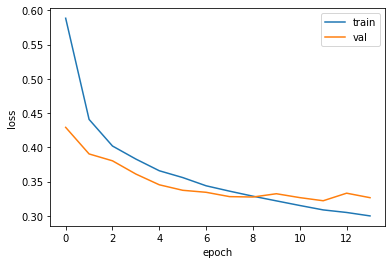

In [41]:
# 그래프로 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [42]:
# 검증 세트 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3221 - accuracy: 0.8848


[0.3220673203468323, 0.8847500085830688]